In [2]:
import pandas as pd
df = pd.read_csv('auto-mpg-clean.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
corr = df.corr()
corr['mpg'].sort_values()

weight         -0.832244
displacement   -0.805127
horsepower     -0.778427
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model year      0.580541
mpg             1.000000
Name: mpg, dtype: float64

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='horsepower', ylabel='mpg'>,
        <AxesSubplot:xlabel='cylinders', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>,
        <AxesSubplot:xlabel='origin', ylabel='mpg'>,
        <AxesSubplot:xlabel='model year', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='weight'>,
        <AxesSubplot:xlabel='weight', ylabel='weight'>,
        <AxesSubplot:xlabel='displacement', ylabel='weight'>,
        <AxesSubplot:xlabel='horsepower', ylabel='weight'>,
        <AxesSubplot:xlabel='cylinders', ylabel='weight'>,
        <AxesSubplot:xlabel='acceleration', ylabel='weight'>,
        <AxesSubplot:xlabel='origin', ylabel='weight'>,
        <AxesSubplot:xlabel='model year', ylabel='weight'>],
       [<AxesSubplot:xlabel='mpg', ylabel='displacement'>,
        <AxesSubplot:xlabel

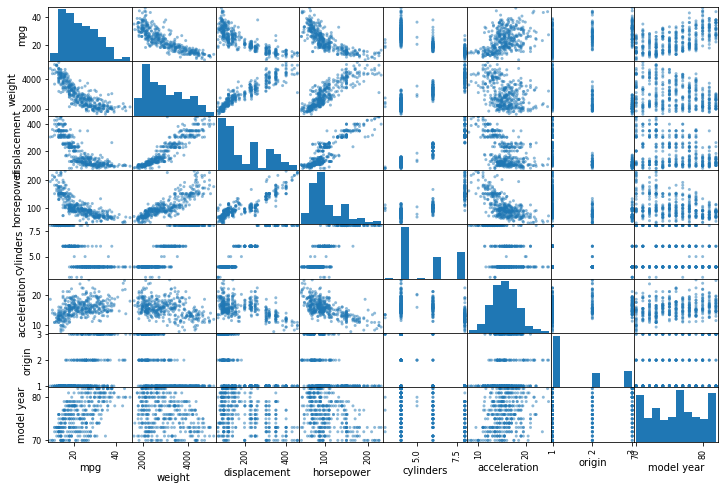

In [5]:
from pandas.plotting import scatter_matrix
attributes = ['mpg', 'weight', 'displacement', 'horsepower', 'cylinders', 'acceleration', 'origin',
'model year']
scatter_matrix(df[attributes], figsize=(12, 8))

In [9]:
features = df.drop(['mpg', 'car name'], axis=1)
targets = df.iloc[:, 0]

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(features, targets)

LinearRegression()

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(targets, reg.predict(features))

10.847480945000449

In [16]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
poly_x = pf.fit_transform(features)
reg2 = LinearRegression()
reg2.fit(poly_x, targets)

LinearRegression()

In [18]:
mean_squared_error(targets, reg2.predict(poly_x))

9.288984443396595